In [1]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [7]:
df=pd.read_csv('data\StudentsPerformance.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\USER\AppData\Local\Temp\ipykernel_17688\1292719692.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv('data\StudentsPerformance.csv')


In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
import re
df.columns = [re.sub(r'[^0-9a-zA-Z_]+', '_', c.strip().lower()) for c in df.columns]

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [13]:
x=df.drop(columns=['math_score'], axis=1)

In [14]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [16]:
y=df['math_score']

In [17]:
cat_features=x.select_dtypes(include="object").columns
print(cat_features)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


1. What is a ColumnTransformer?

A ColumnTransformer is a tool in scikit-learn that lets you apply different preprocessing steps to different columns of a dataset in a single step.

Some columns need scaling (numeric)
Some columns need encoding (categorical)
Some columns may need imputation (filling missing values)

Instead of doing each separately, ColumnTransformer does it all together and outputs a ready-to-use dataset for machine learning.

2. Why is it used?

Machine learning models require all input features to be numeric.
But real datasets often have mixed data types: numeric + categorical
And different types require different preprocessing
ColumnTransformer solves this problem:

It applies the right transformer to the right columns
Outputs a single array or DataFrame ready for the mode

In [18]:
#create column type transformer with 3 types of transformers

num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

#pipeline -> preprocessor
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StanderedScaler", numeric_transformer,num_features)
    ]
)


In [19]:
x=preprocessor.fit_transform(x)
# You use fit_transform() only on the "training data", because:
# You want to learn the parameters (mean, std, categories) from the training set
# Then apply the transformation to the same data

In [ ]:
x.shape
print(x)
# x becomes a NumPy array, not a DataFrame
# Original column names are lost (unless you manually reconstruct them)
# The array is now ready for ML models, which require all numeric input

# If you want x to remain a DataFrame with column names, you can do:
# import pandas as pd

# x_transformed = pd.DataFrame(
#     preprocessor.fit_transform(x),
#     columns = preprocessor.get_feature_names_out()
# )

In [22]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
# variable = list(dictionary.values())[index]-->model=list(models.values())[i]
# Breakdown:
# dictionary.values() - returns a view of all values in the dictionary
# list() - converts the view to a list
# [index] - accesses the element at the specified position


# In Python, the () parentheses are used for both:
# Function calls: function_name()
# Object instantiation: ClassName()
"""class Person:
    def __init__(self, name):
        self.name = name

# Object instantiation  
person = Person("Bob")
__________________________
What happens:
Python finds the class Person
Creates a new instance (allocates memory)
Calls __init__ method to initialize the object
Returns the new object

The name person now holds the object reference



When we write LinearRegression(), Python creates an object of the LinearRegression class
Each object can now:
Be trained (fit)
Make predictions (predict)
Access model-specific attributes (like coefficients)
"""

'class Person:\n    def __init__(self, name):\n        self.name = name\n\n# Object instantiation  \nperson = Person("Bob")\n__________________________\nWhat happens:\nPython finds the class Person\nCreates a new instance (allocates memory)\nCalls __init__ method to initialize the object\nReturns the new object\n\nThe name person now holds the object reference\n\n\n\nWhen we write LinearRegression(), Python creates an object of the LinearRegression class\nEach object can now:\nBe trained (fit)\nMake predictions (predict)\nAccess model-specific attributes (like coefficients)\n'

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806




c:\Users\USER\Desktop\python\Student_Performance_Analysis\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\Desktop\python\Student_Performance_Analysis\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\python\Student_Performance_Analysis\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\python\Student_Performance_Ana

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.5588
- Mean Absolute Error: 6.0150
- R2 Score: 0.7652


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2945
- Mean Absolute Error: 1.8307
- R2 Score: 0.9766
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0321
- Mean Absolute Error: 4.6556
- R2 Score: 0.8505


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
--

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851131
5,Random Forest Regressor,0.850469
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.765204


In [28]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train, y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


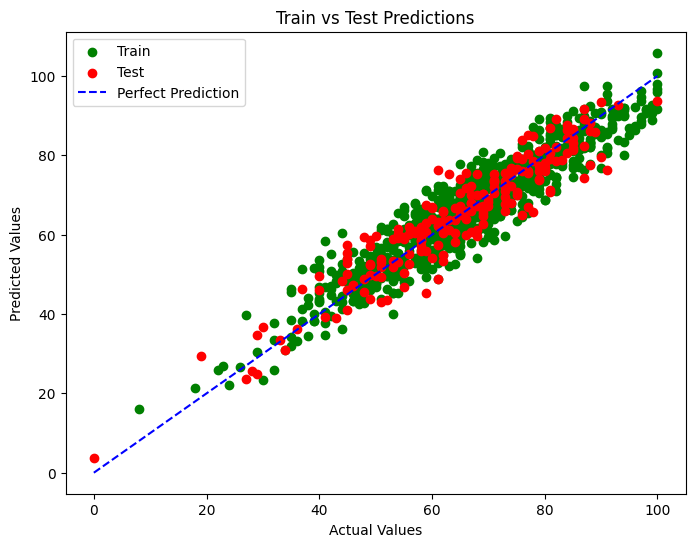

In [29]:
plt.figure(figsize=(8,6))

# Training set
plt.scatter(y_train, lin_model.predict(x_train), color='green', label='Train')

# Test set
plt.scatter(y_test, y_pred, color='red', label='Test')

# Perfect prediction line
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train vs Test Predictions')
plt.legend()
plt.show()



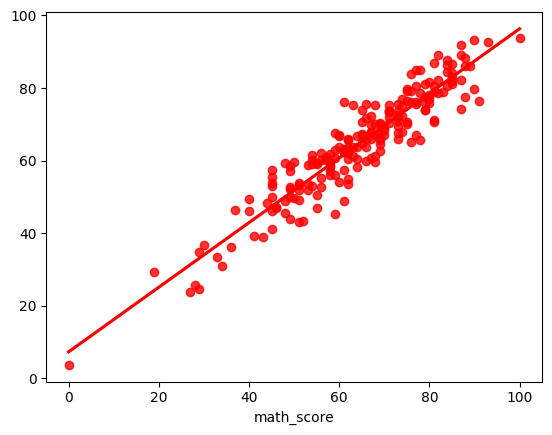

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
